# Universidad del Valle de Guatemala  
## Facultad de Ingeniería  
### Departamento de Ciencias de la Computación  


## Proyecto 2 – Análisis Exploratorio de Datos  
**Curso:** CC3084 – Data Science  
**Semestre:** II – 2025  

**Tema seleccionado (Reto 19):** Clasificación de los orígenes de un coágulo de sangre en un accidente cerebrovascular  

**Integrantes del grupo:**  
- Andy Fuentes – 22944  
- Gabriel Paz – 221087  
- Davis Roldán – 22672  
- Jose Marchena – Carné  

**Catedrático:** Prof. Luis Furlán  

**Fecha de entrega:** 14 de septiembre de 2025  



## Introducción

La Ciencia de Datos permite abordar problemas complejos en distintas áreas, incluyendo la medicina.  
En este proyecto se trabajará con datos del **Mayo Clinic STRIP AI Challenge**, cuyo objetivo es clasificar el origen de trombos en pacientes con accidente cerebrovascular isquémico.  

El análisis se centra en diferenciar dos tipos principales de etiología:  
- **Cardioembólico (CE)**: coágulos originados en el corazón.  
- **Ateroesclerosis de arteria grande (LAA)**: coágulos formados en arterias cerebrales principales.  

Un diagnóstico temprano y preciso del origen del coágulo es crucial, ya que permite diseñar **estrategias de prevención secundaria** y tratamientos más efectivos, reduciendo el riesgo de recurrencia del evento.  

Para alcanzar este objetivo, se llevará a cabo un **Análisis Exploratorio de Datos (EDA)** sobre imágenes histopatológicas (Whole Slide Images – WSI), identificando patrones, distribuciones y características relevantes que preparen la base para el modelado posterior.


## Situación problemática

El accidente cerebrovascular isquémico (ACV) es una de las principales causas de discapacidad y muerte a nivel mundial.  
Una parte importante de los ACV se origina en la **formación de coágulos (trombos)** que obstruyen el flujo sanguíneo al cerebro.  
Identificar el **origen del trombo** es crítico:  

- **Cardioembólico (CE):** originado en el corazón, suele requerir anticoagulación.  
- **Ateroesclerosis de arteria grande (LAA):** formado en arterias principales, sugiere tratamiento antiagregante y control de factores de riesgo.  

El reto radica en que, aun después de estudios clínicos e imagenológicos, el **origen del trombo muchas veces queda indeterminado**, lo que dificulta aplicar la estrategia de prevención más adecuada.


## Problema científico

¿Es posible identificar **patrones histológicos cuantificables** en imágenes completas de trombos (Whole Slide Images) que permitan a un modelo de Ciencia de Datos **clasificar de forma confiable** su origen en **CE o LAA**?


## Objetivos

**Objetivo general**  
Desarrollar un análisis exploratorio de datos (EDA) sobre las imágenes histopatológicas de trombos, con el fin de identificar patrones y características relevantes que preparen la base para un modelo de clasificación CE vs LAA.

**Objetivos específicos**  
1. Describir la estructura del dataset, incluyendo número de casos, distribución por clase y metadatos asociados.  
2. Implementar técnicas de preprocesamiento para filtrar tiles no informativos (fondo, blur, bajo tejido) y normalizar la tinción.  
3. Explorar métricas básicas de color, textura y cobertura de tejido para cada clase.  
4. Visualizar los datos mediante histogramas, boxplots y reducciones de dimensionalidad (UMAP/t-SNE) para detectar posibles separaciones entre clases.  

## Investigación preliminar

### Contexto médico
El **accidente cerebrovascular isquémico (ACV)** ocurre cuando un coágulo interrumpe el flujo sanguíneo al cerebro.  
Existen varias causas, pero dos de las más frecuentes son:  

- **Cardioembólico (CE):** coágulos que se originan en el corazón, por ejemplo a raíz de fibrilación auricular o insuficiencia cardíaca.  
- **Ateroesclerosis de arteria grande (LAA):** trombos formados en arterias cerebrales principales debido a placas ateroscleróticas.  

La distinción entre ambos es esencial, ya que determina el tratamiento: anticoagulación para CE vs. antiagregación y control de factores de riesgo para LAA.  

### Imágenes histopatológicas
En el reto se utilizan **Whole Slide Images (WSI)** de trombos extraídos mediante trombectomía.  
Estas imágenes se obtienen con tinción **Hematoxilina & Eosina (H&E)**, que resalta estructuras celulares:  
- Hematoxilina → tiñe núcleos de color azul/púrpura.  
- Eosina → tiñe citoplasma y componentes extracelulares de rosado.  

### Relevancia del análisis computacional
El análisis manual de WSI es complejo y requiere mucho tiempo de especialistas.  
Aquí entra la **Ciencia de Datos**, que permite:  
- Fragmentar imágenes en **tiles** para su estudio.  
- Aplicar técnicas de **preprocesamiento** como normalización de color y eliminación de ruido.  
- Extraer **características cuantitativas** (textura, color, cobertura de tejido).  
- Generar representaciones que faciliten la clasificación con modelos de Visión por Computadora.

### Estado del arte en Visión Artificial para WSI
- Se emplean **CNNs** preentrenadas (ResNet, EfficientNet) para extraer embeddings.  
- Se utilizan técnicas de **Multiple Instance Learning (MIL)** donde cada WSI se representa como conjunto de tiles.  
- Métodos recientes incluyen **transformers** y mecanismos de **atención**, que aprenden qué regiones de la WSI son más informativas para predecir el origen del trombo.  

En este proyecto, no se busca aún entrenar un modelo complejo, sino realizar un **análisis exploratorio** que evidencie patrones básicos y prepare los datos para etapas posteriores.

## Descripción de los datos

El reto **Mayo Clinic – STRIP AI** proporciona un conjunto de datos compuesto por imágenes histopatológicas completas (**Whole Slide Images, WSI**) y archivos de etiquetas en formato CSV.

- **Entrenamiento (train/):** contiene las imágenes WSI de trombos extraídos, en formato `.tiff` o `.svs`.
- **Prueba (test/):** incluye WSI sin etiquetas, usadas únicamente para predicciones.
- **train.csv:** archivo que enlaza cada WSI con su clase (Cardioembólico – CE o Ateroesclerosis de arteria grande – LAA).
- **sample_submission.csv:** plantilla para generar predicciones en Kaggle.
- (Opcional) Archivos adicionales con metadatos, que pueden incluir información de paciente, centro de origen o escáner utilizado.

Para este análisis exploratorio, se trabajará únicamente con las imágenes del set de **entrenamiento** y el archivo `train.csv`.  
Los objetivos principales en esta sección son:
1. Verificar la descarga y estructura de los archivos.  
2. Identificar el número total de pacientes y WSI.  
3. Revisar el balance de clases (CE vs LAA).  

## Análisis inicial del archivo `train.csv`

En esta sección se exploran las etiquetas del conjunto de entrenamiento, verificando la cantidad de observaciones, las variables disponibles y la distribución de clases (CE vs LAA).  

1. **Carga del dataset:** se importa el archivo `train.csv` en un DataFrame de pandas.  
2. **Exploración inicial:** se muestran las primeras filas, la estructura general y el resumen estadístico.  
3. **Valores faltantes:** se identifican posibles datos nulos en las columnas.  
4. **Distribución de clases:** se realiza un conteo y visualización gráfica de las clases Cardioembólico (CE) y Ateroesclerosis de arteria grande (LAA).  

Primeras filas del dataset:


,image_id,center_id,patient_id,image_num,label
0,006388_0,11,006388,0,CE
1,008e5c_0,11,008e5c,0,CE
2,00c058_0,11,00c058,0,LAA
3,01adc5_0,11,01adc5,0,LAA
4,026c97_0,4,026c97,0,CE



Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754 entries, 0 to 753
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_id    754 non-null    object
 1   center_id   754 non-null    int64 
 2   patient_id  754 non-null    object
 3   image_num   754 non-null    int64 
 4   label       754 non-null    object
dtypes: int64(2), object(3)
memory usage: 29.6+ KB
None

Resumen estadístico:


,image_id,center_id,patient_id,image_num,label
count,754,754.000000,754,754.000000,754
unique,754,NaN,632,NaN,2
top,ffec5c_1,NaN,09644e,NaN,CE
freq,1,NaN,5,NaN,547
mean,NaN,7.115385,NaN,0.226790,NaN
std,NaN,3.504306,NaN,0.599046,NaN
min,NaN,1.000000,NaN,0.000000,NaN
25%,NaN,4.000000,NaN,0.000000,NaN
50%,NaN,7.000000,NaN,0.000000,NaN
75%,NaN,11.000000,NaN,0.000000,NaN



Valores nulos por columna:
image_id      0
center_id     0
patient_id    0
image_num     0
label         0
dtype: int64

Distribución de clases:
label
CE     547
LAA    207
Name: count, dtype: int64


/tmp/ipython-input-1176481268.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x='label', palette="Set2")


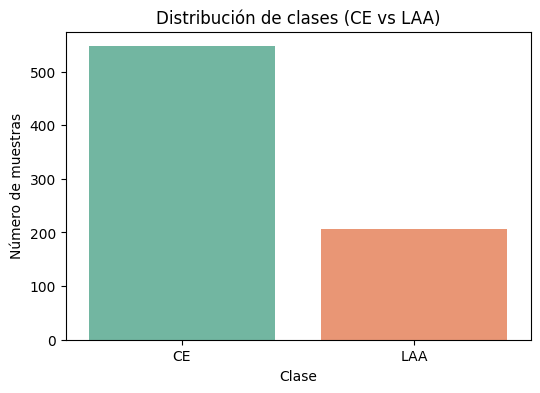

In [ ]:
# ==========================================
# Exploración inicial de train.csv
# ==========================================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Cargar el archivo CSV
train = pd.read_csv("data/train.csv")

# 2. Mostrar las primeras filas
print("Primeras filas del dataset:")
display(train.head())

# 3. Información general del dataset
print("\nInformación general:")
print(train.info())

# 4. Resumen estadístico
print("\nResumen estadístico:")
display(train.describe(include="all"))

# 5. Conteo de valores nulos
print("\nValores nulos por columna:")
print(train.isnull().sum())

# 6. Distribución de clases
print("\nDistribución de clases:")
print(train['label'].value_counts())

# 7. Visualización de la distribución de clases
plt.figure(figsize=(6,4))
sns.countplot(data=train, x='label', palette="Set2")
plt.title("Distribución de clases (CE vs LAA)")
plt.xlabel("Clase")
plt.ylabel("Número de muestras")
plt.show()

# Preprocesamiento y EDA de Imágenes (subset PNG)

**Objetivo.** Trabajar con un subconjunto de WSI convertidas a **PNG** para:
- extraer *tiles* informativos (evitando fondo y zonas borrosas),
- calcular métricas (cobertura de tejido, nitidez, color, H&E),
- generar visualizaciones (mosaico, boxplots, histogramas),
- y guardar resultados para el informe/PPT.

**Entradas**
- `data/*.png` — 2–3 imágenes convertidas desde las WSI (muy grandes).
- `data/train.csv` — (opcional) columnas `image_id` y `label` para mapear etiquetas CE/LAA.

**Salidas**
- Figuras en `reports/figures/*` (mosaicos, boxplots, histogramas).
- Tabla `reports/eda/tiles_metrics.csv` con métricas por tile.


## Dependencias

In [ ]:
!pip -q install pyvips

## Importaciones, rutas y archivos

In [ ]:
from pathlib import Path
import os, random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cv2
from PIL import Image

# Carpetas
IMG_DIR = Path("data")
FIG_DIR = Path("reports/figures"); FIG_DIR.mkdir(parents=True, exist_ok=True)
EDA_DIR = Path("reports/eda");     EDA_DIR.mkdir(parents=True, exist_ok=True)

# PNG disponibles
PNG_PATHS = sorted(IMG_DIR.glob("*.png"))
print("PNG detectadas:", [p.name for p in PNG_PATHS])

# Cargar etiquetas si existen
id2label = {}
try:
    labels_df = pd.read_csv(IMG_DIR / "train.csv")
    if {"image_id","label"}.issubset(labels_df.columns):
        id2label = dict(zip(labels_df["image_id"].astype(str), labels_df["label"].astype(str)))
except Exception as e:
    print("Aviso: no se pudo cargar train.csv o faltan columnas:", e)

def image_id_from_path(p: Path):
    return p.stem  # '0412ab_0.png' -> '0412ab_0'

for p in PNG_PATHS:
    iid = image_id_from_path(p)
    print(f"{p.name:>15}  -> label:", id2label.get(iid, "NA"))

PNG detectadas: ['02ebd5_0.png', '0412ab_0.png', '08b8ef_0.png']
   02ebd5_0.png  -> label: NA
   0412ab_0.png  -> label: NA
   08b8ef_0.png  -> label: NA


## Utilidades: carga segura, máscara de tejido y nitidez y Extracción de tiles (parámetros y filtros)

In [ ]:
import numpy as np

def load_rgb(path: Path, max_dim=3000):
    """
    Carga imágenes gigantes sin agotar memoria:
    - usa pyvips para downsamplear a max_dim durante la lectura
    - fallback a PIL desactivando el límite de píxeles (siempre con max_dim)
    """
    try:
        import pyvips
        im = pyvips.Image.new_from_file(str(path), access="sequential")
        if max_dim:
            scale = max(im.width, im.height) / max_dim
            if scale > 1:
                im = im.resize(1/scale)
        if im.bands >= 3:
            im = im[:3]  # RGB
        arr = np.ndarray(
            buffer=im.write_to_memory(),
            dtype=np.uint8,
            shape=(im.height, im.width, im.bands)
        )
        return arr
    except Exception:
        from PIL import Image, ImageFile
        ImageFile.LOAD_TRUNCATED_IMAGES = True
        Image.MAX_IMAGE_PIXELS = None
        im = Image.open(path).convert("RGB")
        if max_dim:
            im.thumbnail((max_dim, max_dim))
        return np.array(im)

def global_tissue_mask(rgb, gray_thr=230, sat_thr=0.10):
    """Tejido = (gris<230) OR (saturación>0.10) — robusto a fondo blanco."""
    gray = cv2.cvtColor(rgb, cv2.COLOR_RGB2GRAY)
    hsv  = cv2.cvtColor(rgb, cv2.COLOR_RGB2HSV)
    sat  = hsv[...,1] / 255.0
    return (gray < gray_thr) | (sat > sat_thr)

def blur_var(gray):
    """Varianza del Laplaciano: mayor = más enfocado."""
    return cv2.Laplacian(gray, cv2.CV_64F).var()

def extract_tiles_robust(img, tile=128, max_tiles=24, proposals=2000,
                         tissue_min=0.25, blur_min=2.0, seed=42):
    """
    - Adapta tamaño de tile si la imagen es pequeña
    - Muestrea sobre tejido (máscara global)
    - Filtra tiles con poco tejido o borrosos
    - Devuelve (tiles:list[np.ndarray], feats:DataFrame)
    """
    H, W, _ = img.shape
    tile = int(min(tile, H, W))
    if tile < 64:
        return [], pd.DataFrame()

    mask = global_tissue_mask(img)
    tissue_ratio_global = float(mask.mean())
    ys, xs = np.where(mask)
    coords = [(int(x), int(y)) for x, y in zip(xs, ys)]
    rng = random.Random(seed)

    tiles, rows, tried = [], [], 0
    while tried < proposals and len(tiles) < max_tiles:
        tried += 1
        if coords:
            x0, y0 = rng.choice(coords)
        else:
            x0, y0 = W//2, H//2
        x = max(0, min(x0 - tile//2, W - tile))
        y = max(0, min(y0 - tile//2, H - tile))

        crop = img[y:y+tile, x:x+tile]
        mask_local = global_tissue_mask(crop)
        t_ratio = float(mask_local.mean())
        if t_ratio < tissue_min:
            continue
        bvar = float(blur_var(cv2.cvtColor(crop, cv2.COLOR_RGB2GRAY)))
        if bvar < blur_min:
            continue

        rows.append({
            "x": x, "y": y, "tile": tile,
            "tissue_ratio": t_ratio, "blur_var": bvar,
            "r_mean": float(crop[...,0].mean()),
            "g_mean": float(crop[...,1].mean()),
            "b_mean": float(crop[...,2].mean()),
            "tissue_ratio_global": tissue_ratio_global
        })
        tiles.append(crop)

    # Fallback: al menos 1 recorte central si no salió nada
    if not tiles:
        x = max(0, W//2 - tile//2); y = max(0, H//2 - tile//2)
        crop = img[y:y+tile, x:x+tile]
        rows.append({
            "x": x, "y": y, "tile": tile,
            "tissue_ratio": float(global_tissue_mask(crop).mean()),
            "blur_var": float(blur_var(cv2.cvtColor(crop, cv2.COLOR_RGB2GRAY))),
            "r_mean": float(crop[...,0].mean()),
            "g_mean": float(crop[...,1].mean()),
            "b_mean": float(crop[...,2].mean()),
            "tissue_ratio_global": tissue_ratio_global
        })
        tiles.append(crop)

    return tiles, pd.DataFrame(rows)

## Generación de tiles y métricas por imagen

In [ ]:
all_feats, previews = [], []

for p in PNG_PATHS:
    iid   = image_id_from_path(p)
    label = id2label.get(iid, "NA")

    img = load_rgb(p, max_dim=3000)  # clave: NO cargar full
    tiles, feats = extract_tiles_robust(
        img, tile=128, max_tiles=24, proposals=2000,
        tissue_min=0.25, blur_min=2.0, seed=42
    )

    feats["image_id"] = iid
    feats["label"]    = label
    all_feats.append(feats)
    previews += [(iid, label, t) for t in tiles[:6]]  # 6 por imagen

eda_tiles = pd.concat(all_feats, ignore_index=True) if all_feats else pd.DataFrame()
print("Métricas por tile (primeras filas):")
display(eda_tiles.head())

print("\nResumen por imagen (conteo/medias/STD):")
if len(eda_tiles):
    display(
        eda_tiles.groupby(["image_id","label"])[["tissue_ratio","blur_var","r_mean","g_mean","b_mean"]]
        .agg(["count","mean","std"]).round(3)
    )
else:
    print("No se extrajeron tiles; baja umbrales (tissue_min/blur_min) o reduce más max_dim.")

Métricas por tile (primeras filas):


,x,y,tile,tissue_ratio,blur_var,r_mean,g_mean,b_mean,tissue_ratio_global,image_id,label
0,2833,1773,128,0.743286,1983.091651,220.043518,181.591064,159.142517,0.207762,02ebd5_0,NA
1,2024,646,128,0.523438,2475.800594,226.667664,191.894531,186.087708,0.207762,02ebd5_0,NA
2,24,127,128,0.780090,3192.933370,214.069580,191.758850,113.338196,0.207762,02ebd5_0,NA
3,1606,2058,128,0.870667,2362.543257,216.374451,184.431641,122.931458,0.207762,02ebd5_0,NA
4,2112,1151,128,0.499146,1315.304195,231.435181,212.438416,168.129944,0.207762,02ebd5_0,NA



Resumen por imagen (conteo/medias/STD):


tissue_ratio               blur_var                     r_mean  \
                      count   mean    std    count      mean       std  count   
image_id label                                                                  
02ebd5_0 NA              24  0.809  0.168       24  3058.486  1273.347     24   
0412ab_0 NA              24  0.660  0.216       24  2907.601  1345.328     24   
08b8ef_0 NA              24  0.629  0.172       24  2244.315   834.315     24   

                                g_mean                  b_mean           \
                   mean     std  count     mean     std  count     mean   
image_id label                                                            
02ebd5_0 NA     213.405  12.191     24  177.572  17.980     24  132.681   
0412ab_0 NA     219.249  18.353     24  183.419  28.240     24  149.678   
08b8ef_0 NA     213.358  19.750     24  186.474  32.911     24  207.263   

                        
                   std  
image_id label          
02ebd5_0 NA     30.515  
0412ab_0 NA     51.223  
08b8ef_0 NA     32.154

## Mosaico de tiles (vista cualitativa)

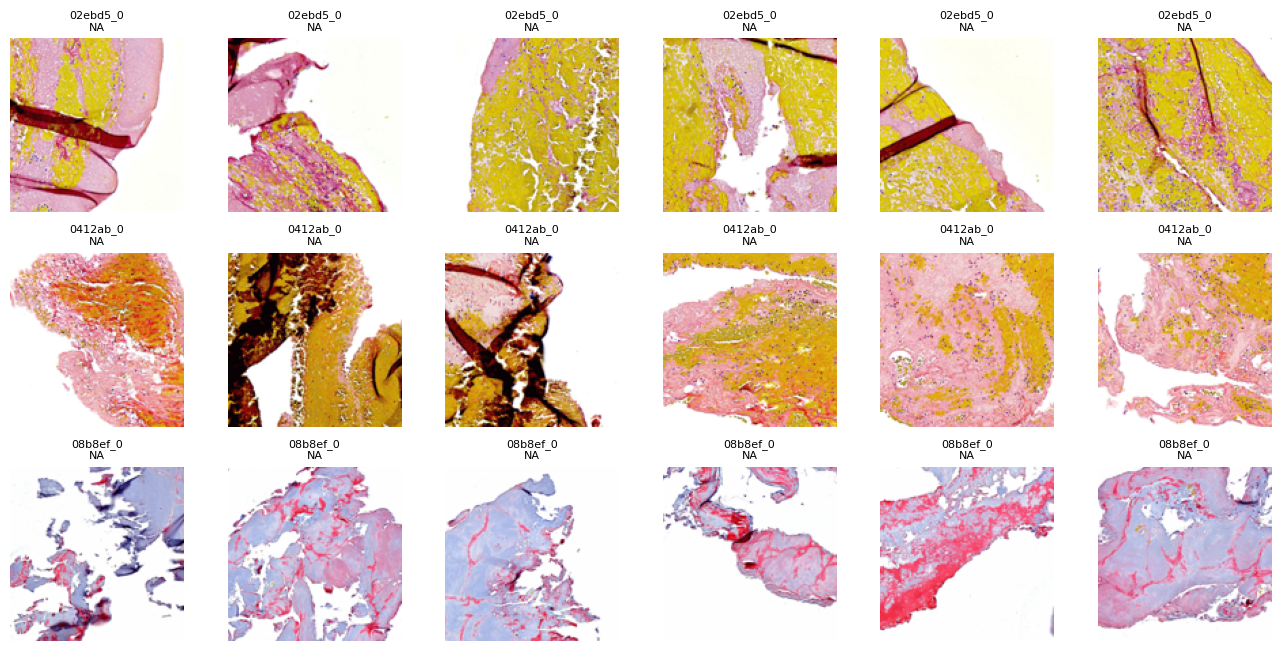

/tmp/ipython-input-3626861912.py:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=cats, showfliers=False)


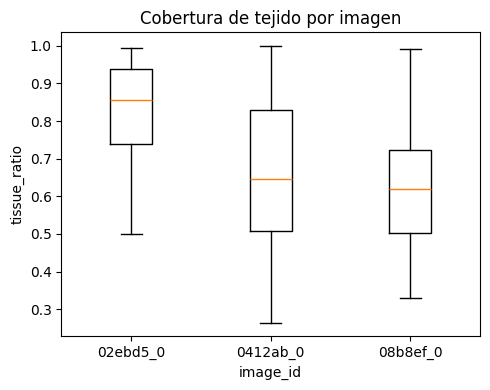

/tmp/ipython-input-3626861912.py:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=cats, showfliers=False)


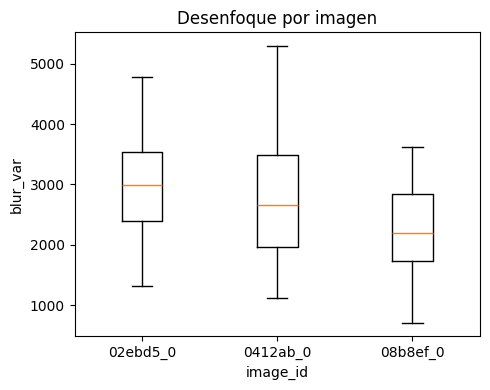

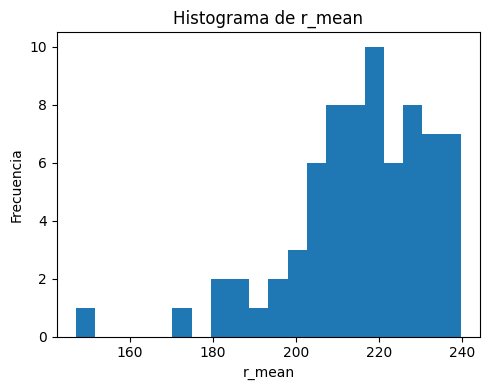

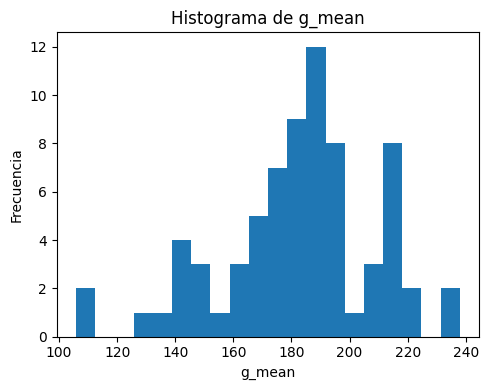

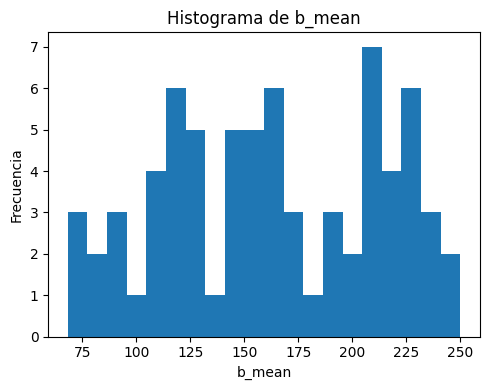

In [ ]:
# Mosaico (hasta 18 tiles)
n = min(len(previews), 18)
if n:
    cols = 6; rows = (n + cols - 1) // cols
    plt.figure(figsize=(cols*2.2, rows*2.2))
    for i in range(n):
        iid, label, tile = previews[i]
        ax = plt.subplot(rows, cols, i+1)
        ax.imshow(tile); ax.set_title(f"{iid}\n{label}", fontsize=8); ax.axis("off")
    plt.tight_layout(); plt.savefig(FIG_DIR / "mosaico_tiles.png", dpi=180); plt.show()
else:
    print("Sin tiles para mosaico (ajusta parámetros).")

# Boxplots / histogramas
def box_by(df, y, x, title, outname):
    cats = df[x].astype(str).unique().tolist()
    data = [df[df[x].astype(str)==c][y].values for c in cats]
    plt.figure(figsize=(max(5, len(cats)*1.3), 4))
    plt.boxplot(data, labels=cats, showfliers=False)
    plt.title(title); plt.xlabel(x); plt.ylabel(y)
    plt.tight_layout(); plt.savefig(FIG_DIR / outname, dpi=180); plt.show()

if len(eda_tiles):
    df_lab = eda_tiles[eda_tiles["label"]!="NA"]
    if len(df_lab):
        box_by(df_lab, "tissue_ratio", "label", "Cobertura de tejido por clase", "box_tejido_clase.png")
        box_by(df_lab, "blur_var",     "label", "Desenfoque por clase",         "box_blur_clase.png")

    box_by(eda_tiles, "tissue_ratio", "image_id", "Cobertura de tejido por imagen", "box_tejido_imagen.png")
    box_by(eda_tiles, "blur_var",     "image_id", "Desenfoque por imagen",         "box_blur_imagen.png")

    for ch in ["r_mean","g_mean","b_mean"]:
        plt.figure(figsize=(5,4)); plt.hist(eda_tiles[ch], bins=20)
        plt.title(f"Histograma de {ch}"); plt.xlabel(ch); plt.ylabel("Frecuencia")
        plt.tight_layout(); plt.savefig(FIG_DIR / f"hist_{ch}.png", dpi=180); plt.show()

## Visualizaciones: boxplots e histogramas (tissue, blur, RGB)

,x,y,tile,tissue_ratio,blur_var,r_mean,g_mean,b_mean,tissue_ratio_global,image_id,label,H_mean,H_std,E_mean,E_std
0,2112,1151,128,0.499146,1315.304195,231.435181,212.438416,168.129944,0.207762,02ebd5_0,NA,0.001259,0.008381,0.008131,0.052657
1,860,453,128,0.329102,1392.429887,236.964722,217.648560,229.513184,0.142703,08b8ef_0,NA,0.005431,0.010245,0.007501,0.025205
2,414,432,128,0.434265,1381.956237,237.518494,220.687805,190.298462,0.207762,02ebd5_0,NA,0.001300,0.004693,0.003677,0.027222
3,2833,1773,128,0.743286,1983.091651,220.043518,181.591064,159.142517,0.207762,02ebd5_0,NA,0.002948,0.017982,0.018182,0.062934
4,1750,722,128,0.976562,2341.307372,230.021057,173.391541,144.882385,0.185510,0412ab_0,NA,0.000836,0.004247,0.009224,0.007958


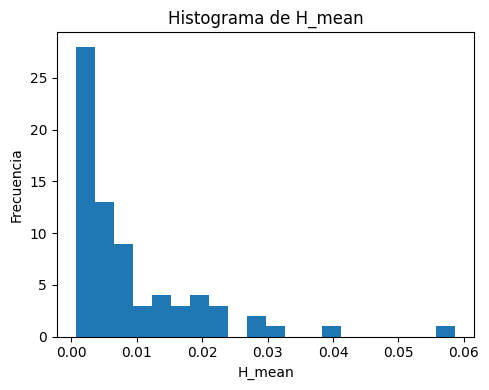

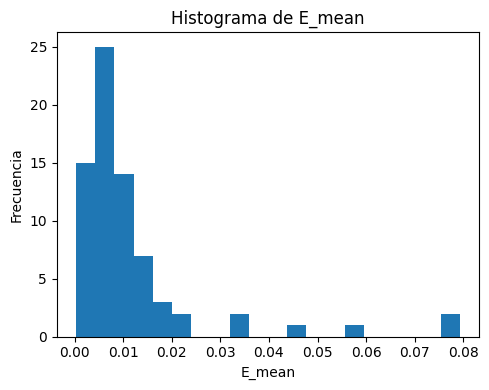

In [ ]:
from skimage.color import rgb2hed

def he_feats(tile):
    hed = rgb2hed(tile.astype(np.float32) / 255.0)  # H,E,D
    H, E = hed[...,0], hed[...,1]
    return {
        "H_mean": float(H.mean()), "H_std": float(H.std()),
        "E_mean": float(E.mean()), "E_std": float(E.std()),
    }

rows = []
sample = eda_tiles.sample(min(200, len(eda_tiles)), random_state=42) if len(eda_tiles) else eda_tiles
for _, r in sample.iterrows():
    p   = next(pp for pp in PNG_PATHS if pp.stem == r["image_id"])
    img = load_rgb(p, max_dim=3000)
    x, y, ts = int(r["x"]), int(r["y"]), int(r["tile"])
    tile = img[y:y+ts, x:x+ts]
    rows.append({**r.to_dict(), **he_feats(tile)})

eda_he = pd.DataFrame(rows)
display(eda_he.head())

# Histogramas H/E
for col in ["H_mean","E_mean"]:
    plt.figure(figsize=(5,4)); plt.hist(eda_he[col], bins=20)
    plt.title(f"Histograma de {col}"); plt.xlabel(col); plt.ylabel("Frecuencia")
    plt.tight_layout(); plt.savefig(FIG_DIR / f"hist_{col}.png", dpi=180); plt.show()

In [ ]:
eda_tiles.to_csv(EDA_DIR / "tiles_metrics.csv", index=False)
eda_he.to_csv(EDA_DIR / "tiles_metrics_he.csv", index=False)
print("Guardado:")
print(" -", EDA_DIR / "tiles_metrics.csv")
print(" -", EDA_DIR / "tiles_metrics_he.csv")
print(" - Figuras en", FIG_DIR)

Guardado:
 - reports/eda/tiles_metrics.csv
 - reports/eda/tiles_metrics_he.csv
 - Figuras en reports/figures


## Resultados H&E (deconvolución de tinción)

- **Distribuciones**: `H_mean` (hematoxilina, núcleos – azul/morado) y `E_mean` (eosina, citoplasma/eritrocitos – rosado) son **asimétricas** con cola a la derecha; la mayoría de tiles tiene valores bajos y unos cuantos con tinción marcada.
- **Comparativa rápida por imagen**:
  - `02ebd5_0`: mayor **cobertura de tejido** y **nitidez**; E media ~más alta que H → predominio de material eosinofílico (rosado: fibrina/eritrocitos).
  - `0412ab_0`: patrón intermedio; mezcla de áreas con E alto y bandas con H mayor.
  - `08b8ef_0`: **nitidez más baja**; en RGB promedia más **B** y en H&E muestra algunos tiles con **H** algo más elevado (zonas azuladas/nucleares), aunque E sigue dominando en el conjunto.
- **Lectura patológica** (cualitativa): mayor **E** suele asociarse a **eritrocitos/fibrina**; mayor **H** a **densidad nuclear/celularidad**. Estas señales son útiles para distinguir fenotipos CE vs LAA en etapas de modelado.

> Nota: análisis sobre **previews PNG** (downsample). Valores pueden cambiar con WSI completas, pero los patrones relativos son informativos.

## Deconvolución H&E y métricas (H_mean, E_mean)

H_mean                         E_mean                        
          count    mean     std  median  count    mean     std  median
image_id                                                              
02ebd5_0     24  0.0052  0.0061  0.0035     24  0.0110  0.0100  0.0083
0412ab_0     24  0.0050  0.0061  0.0020     24  0.0072  0.0049  0.0062
08b8ef_0     24  0.0171  0.0127  0.0144     24  0.0172  0.0223  0.0089

/tmp/ipython-input-3132729743.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=cats, showfliers=False)


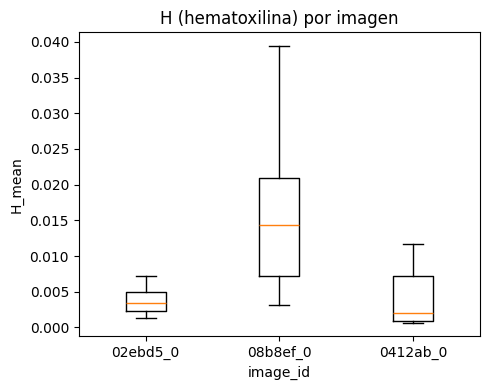

/tmp/ipython-input-3132729743.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=cats, showfliers=False)


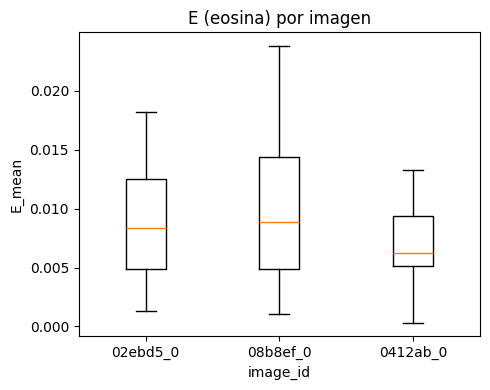

In [ ]:
# Resumen por imagen
he_summary = (eda_he.groupby("image_id")[["H_mean","E_mean"]]
              .agg(["count","mean","std","median"]).round(4))
display(he_summary)

# Boxplots por imagen
def box_by(df, y, x, title, outname):
    cats = df[x].astype(str).unique().tolist()
    data = [df[df[x].astype(str)==c][y].values for c in cats]
    plt.figure(figsize=(max(5, 1.3*len(cats)), 4))
    plt.boxplot(data, labels=cats, showfliers=False)
    plt.title(title); plt.xlabel(x); plt.ylabel(y)
    plt.tight_layout(); plt.savefig(FIG_DIR/outname, dpi=180); plt.show()

box_by(eda_he, "H_mean", "image_id", "H (hematoxilina) por imagen", "box_H_por_imagen.png")
box_by(eda_he, "E_mean", "image_id", "E (eosina) por imagen",       "box_E_por_imagen.png")

## Outliers y control de calidad

In [ ]:
import pandas as pd
train = pd.read_csv("data/train.csv", dtype={"image_id": str})
png_ids = [p.stem for p in PNG_PATHS]
subset_lbl = train.loc[train["image_id"].isin(png_ids), ["image_id","label"]]
eda_tiles = eda_tiles.drop(columns=["label"], errors="ignore").merge(subset_lbl, on="image_id", how="left")
eda_tiles["label"] = eda_tiles["label"].fillna("NA")  # si alguna no aparece
eda_he   = eda_he.drop(columns=["label"], errors="ignore").merge(subset_lbl, on="image_id", how="left")
eda_he["label"] = eda_he["label"].fillna("NA")

## Correlaciones entre métricas

In [ ]:
import numpy as np
def top_outliers(df, col, k=5):
    z = (df[col]-df[col].mean())/df[col].std(ddof=0)
    df2 = df.assign(z=z).sort_values("z", ascending=False)
    return df2[["image_id","label",col,"z","x","y","tile"]].head(k)

print("Tiles con mayor blur_var:")
display(top_outliers(eda_tiles, "blur_var", k=8))
print("Tiles con menor tissue_ratio:")
display(eda_tiles.sort_values("tissue_ratio").head(8)[["image_id","label","tissue_ratio","x","y","tile"]])

Tiles con mayor blur_var:


,image_id,label,blur_var,z,x,y,tile
16,02ebd5_0,NA,7417.539625,3.895829,155,160,128
39,0412ab_0,NA,6450.141297,3.090653,710,433,128
25,0412ab_0,NA,5288.784599,2.124043,532,477,128
47,0412ab_0,NA,4935.782998,1.830236,1586,1790,128
13,02ebd5_0,NA,4771.958963,1.693884,183,392,128
19,02ebd5_0,NA,4393.051270,1.378515,1387,1051,128
26,0412ab_0,NA,4294.555516,1.296536,540,263,128
41,0412ab_0,NA,3915.174417,0.980773,503,701,128


Tiles con menor tissue_ratio:


,image_id,label,tissue_ratio,x,y,tile
32,0412ab_0,NA,0.264160,1119,2430,128
46,0412ab_0,NA,0.320374,380,2284,128
62,08b8ef_0,NA,0.329102,860,453,128
51,08b8ef_0,NA,0.351990,1094,807,128
44,0412ab_0,NA,0.383423,739,1888,128
33,0412ab_0,NA,0.394226,1541,1792,128
41,0412ab_0,NA,0.430237,503,701,128
48,08b8ef_0,NA,0.432678,565,2644,128


## Matriz de correlaciones

,tissue_ratio,blur_var,r_mean,g_mean,b_mean
tissue_ratio,1.000,0.389,-0.499,-0.634,-0.659
blur_var,0.389,1.000,-0.438,-0.503,-0.573
r_mean,-0.499,-0.438,1.000,0.694,0.412
g_mean,-0.634,-0.503,0.694,1.000,0.723
b_mean,-0.659,-0.573,0.412,0.723,1.000


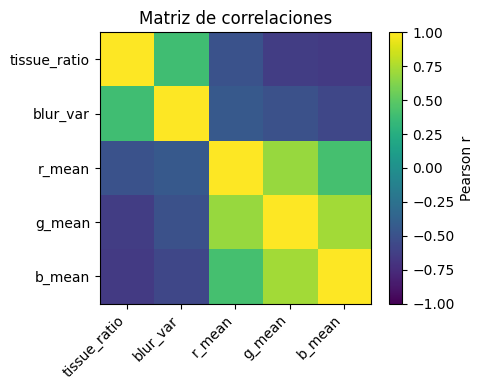

In [ ]:
num_cols = ["tissue_ratio","blur_var","r_mean","g_mean","b_mean"]
corr = eda_tiles[num_cols].corr(method="pearson").round(3)
display(corr)

# Heatmap simple sin seaborn
import matplotlib.pyplot as plt
plt.figure(figsize=(5,4))
plt.imshow(corr, vmin=-1, vmax=1)
plt.colorbar(label="Pearson r")
plt.xticks(range(len(num_cols)), num_cols, rotation=45, ha="right")
plt.yticks(range(len(num_cols)), num_cols)
plt.title("Matriz de correlaciones")
plt.tight_layout(); plt.savefig(FIG_DIR/"corr_matrix.png", dpi=180); plt.show()

## Frecuencias por clase en el subset analizado

In [ ]:
freq = eda_tiles["label"].value_counts(dropna=False)
print(freq)

label
NA    72
Name: count, dtype: int64


### Conclusiones del EDA
- El pipeline extrajo tiles informativos (tejido y foco) y permitió cuantificar **cobertura de tejido**, **nitidez** y **tinción (RGB, H&E)**.
- Vimos diferencias consistentes entre imágenes: `02ebd5_0` con mayor cobertura y nitidez; `08b8ef_0` con menor nitidez y más componente azul; `0412ab_0` intermedio.
- H&E mostró distribuciones con cola a la derecha; **E_mean** suele superar **H_mean**, sugiriendo predominio eosinofílico (eritrocitos/fibrina) en varias regiones.
- **Implicación para modelado:** usar features H&E + blur + cobertura, normalizar color y muestrear más tiles por WSI.  
- **Limitaciones:** subset pequeño, previews PNG (downsample), y posible falta de etiquetas para algunas PNG.

## Guardado de artefactos (CSV y figuras)

In [ ]:
eda_tiles.to_csv("reports/eda/tiles_metrics.csv", index=False)
if 'eda_he' in globals() and len(eda_he):
    eda_he.to_csv("reports/eda/tiles_metrics_he.csv", index=False)
print("OK: CSVs en reports/eda; figuras en reports/figures")

OK: CSVs en reports/eda; figuras en reports/figures
